In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('hls', 10, desat = 0.8)
#colors = colors[::-1]
colors.pop(2)

sns.set_palette(colors)

#sns.palplot(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [142]:
def slope_fork(x_j):
    if x_j >= 0.5:
        return 1
    else:
        return -0.59
    
def update_x(x_j, eps, N_tot):
    x_up = x_j + (slope_fork(x_j) * eps) / N_tot
    if x_up < 1:
        return x_up
    else:
        return 1

def clap(x, w, t, t_clap, sig):
    x = 0
    w = np.random.normal(0, sig) + 1 / (t - t_clap)
    t_clap = t
    return x, w, t_clap


In [290]:

def sim2(x_init, w_init, t_clap_init, dt, tmax, sig=0.1, eps=0.1):

    t = 0.1
    x = x_init
    w = w_init
    t_clap = t_clap_init
    x0_save = []
    
    N = len(w)
    w_save = [[] for i in range(N)]
    t_save = [[] for i in range(N)]
    avg_save = []
    
    for entry in range(len(w_save)):
        w_save[entry].append(w[entry])
        t_save[entry].append(t)

    print(w_save)

    while t < tmax:
        
        x = x + w*dt
        index = np.where(x >= 1)[0]

        if len(index) < 1:
            pass

        else: 
            for i in index:
                x[i] = 0
                w[i] = np.random.normal(0, sig) + 1 / (t - t_clap[i])
                t_clap[i] = t
                
                w_save[i].append(w[i])
                t_save[i].append(t_clap[i])

                # Update all other x
                for j in range(len(x)):
                    if j != i:
                        x[j] = update_x(x[j], eps, N)
                    else:
                        continue             
        t += dt
        x0_save.append(x[0])

        if int(t % (dt*10)) == 0: 
            avg_save.append(np.mean(w))
            
    return w_save, t_save, x0_save, avg_save

In [291]:
N = 100
w_init = np.random.normal(2, 0.1, N)
x_list = np.zeros(N)
t_clap = np.zeros(N)

dt = 0.0025
t_max = 10

w_save, t_save, x0_list, avg_save = sim2(x_list, w_init, t_clap, dt, t_max, sig=0.1, eps=0.1)


[[2.0590626746903866], [2.297879652716109], [1.7369318490189316], [1.9802400899714028], [2.010341540984295], [1.939908067670252], [2.0563091731886116], [1.9322982878176207], [2.100508946461893], [2.0436937350748616], [1.902827354780992], [2.067778592684166], [2.032559292723421], [1.9677382431931705], [2.002876274111872], [1.8495010692749554], [2.0035680741190682], [1.9077463674687614], [2.0106601241065296], [2.054055258907382], [1.9785613180108754], [1.991660763684247], [2.0509850505247966], [2.147001324812409], [1.8110912234960574], [1.853970836364458], [2.0554719426999895], [1.7886619844976157], [1.9308605432727262], [2.1909393325554345], [2.078603150149246], [1.996698951041728], [1.9951511452027548], [1.8659524219025732], [2.0307841826988677], [1.9451429094960755], [2.0959823350423594], [2.0421620900340987], [2.0897730238125902], [1.9376689181434181], [1.954197040085797], [2.1236455313383087], [1.9096569395404173], [1.83965190450907], [1.9377268684475435], [1.941687480406017], [1.86

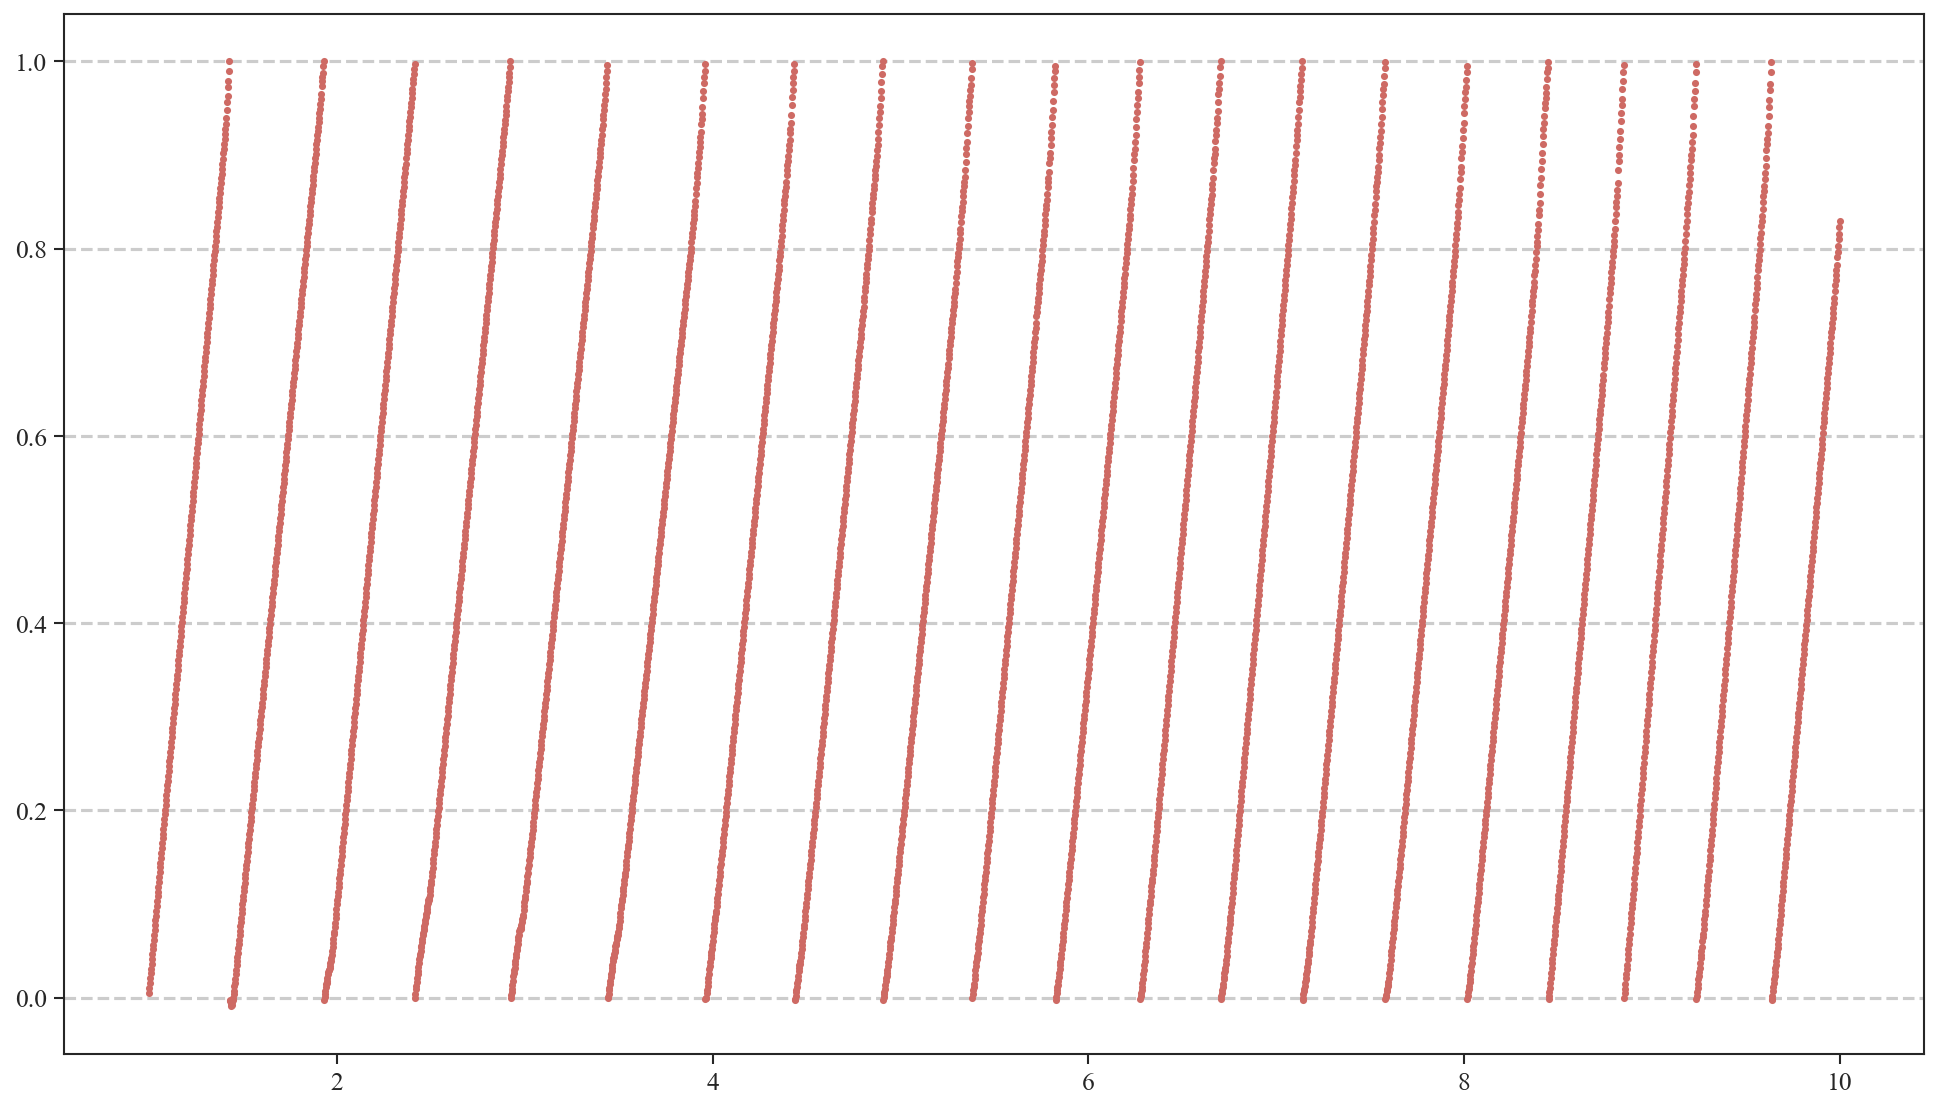

In [292]:
time = np.linspace(1, t_max, len(x0_list))
plt.plot(time, x0_list, marker='.', linestyle='')
#plt.xlim(1, 1.5)
#plt.ylim(-0.2, 1)

Text(0, 0.5, 'Frequency')

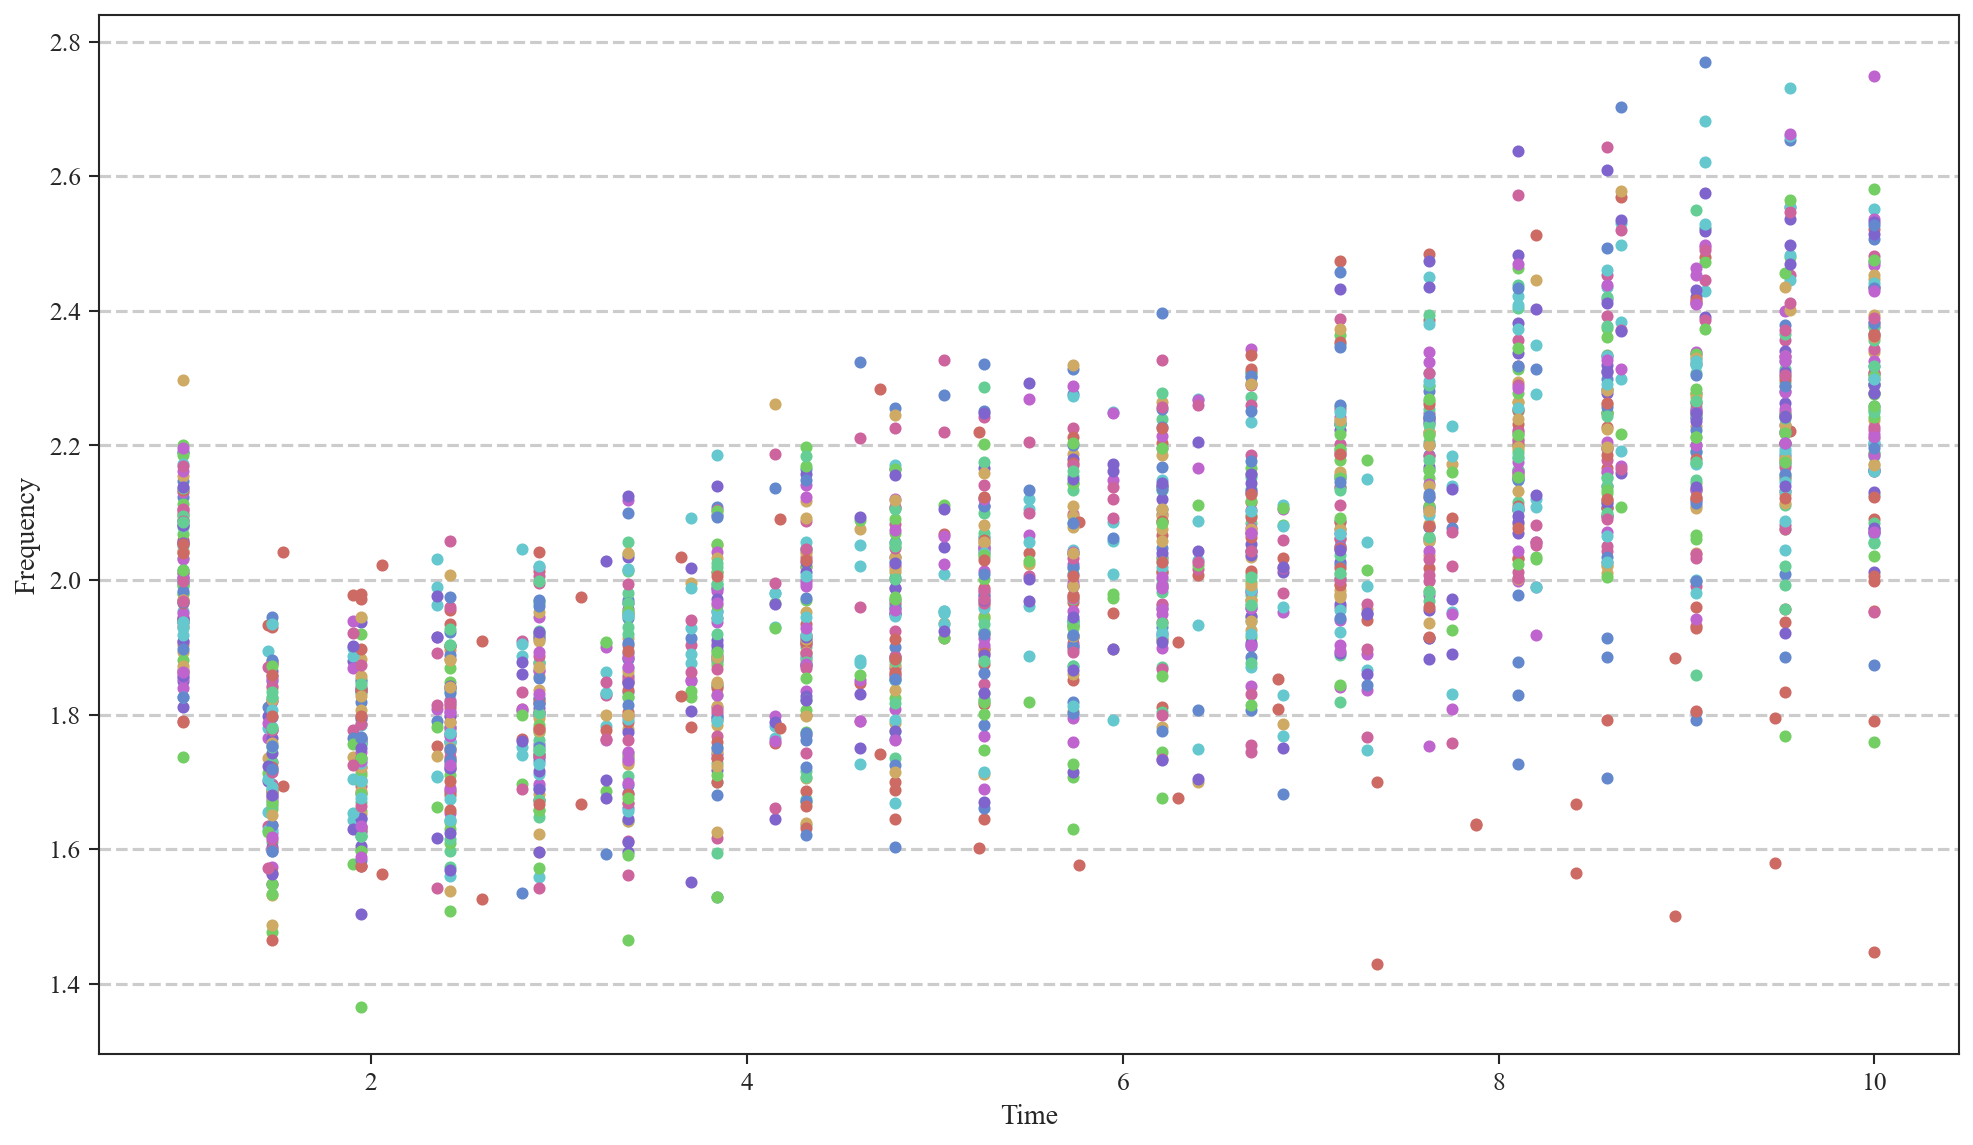

In [293]:


for i in range(len(w_save)):
    x = np.linspace(1, t_max, len(w_save[i]))
    plt.plot(x, w_save[i], 'o', label=fr'$\omega_{i}$')

#w_mean = np.mean(w_save, axis=0)
#w_std = np.std(w_save, axis=0)
#plt.errorbar(x, w_mean, yerr=w_std, fmt='o', markersize=8, capsize=8, color='k')


plt.xlabel('Time')
plt.ylabel('Frequency')
#plt.xlim(20,25)
#plt.ylim(6,12)
#plt.legend()

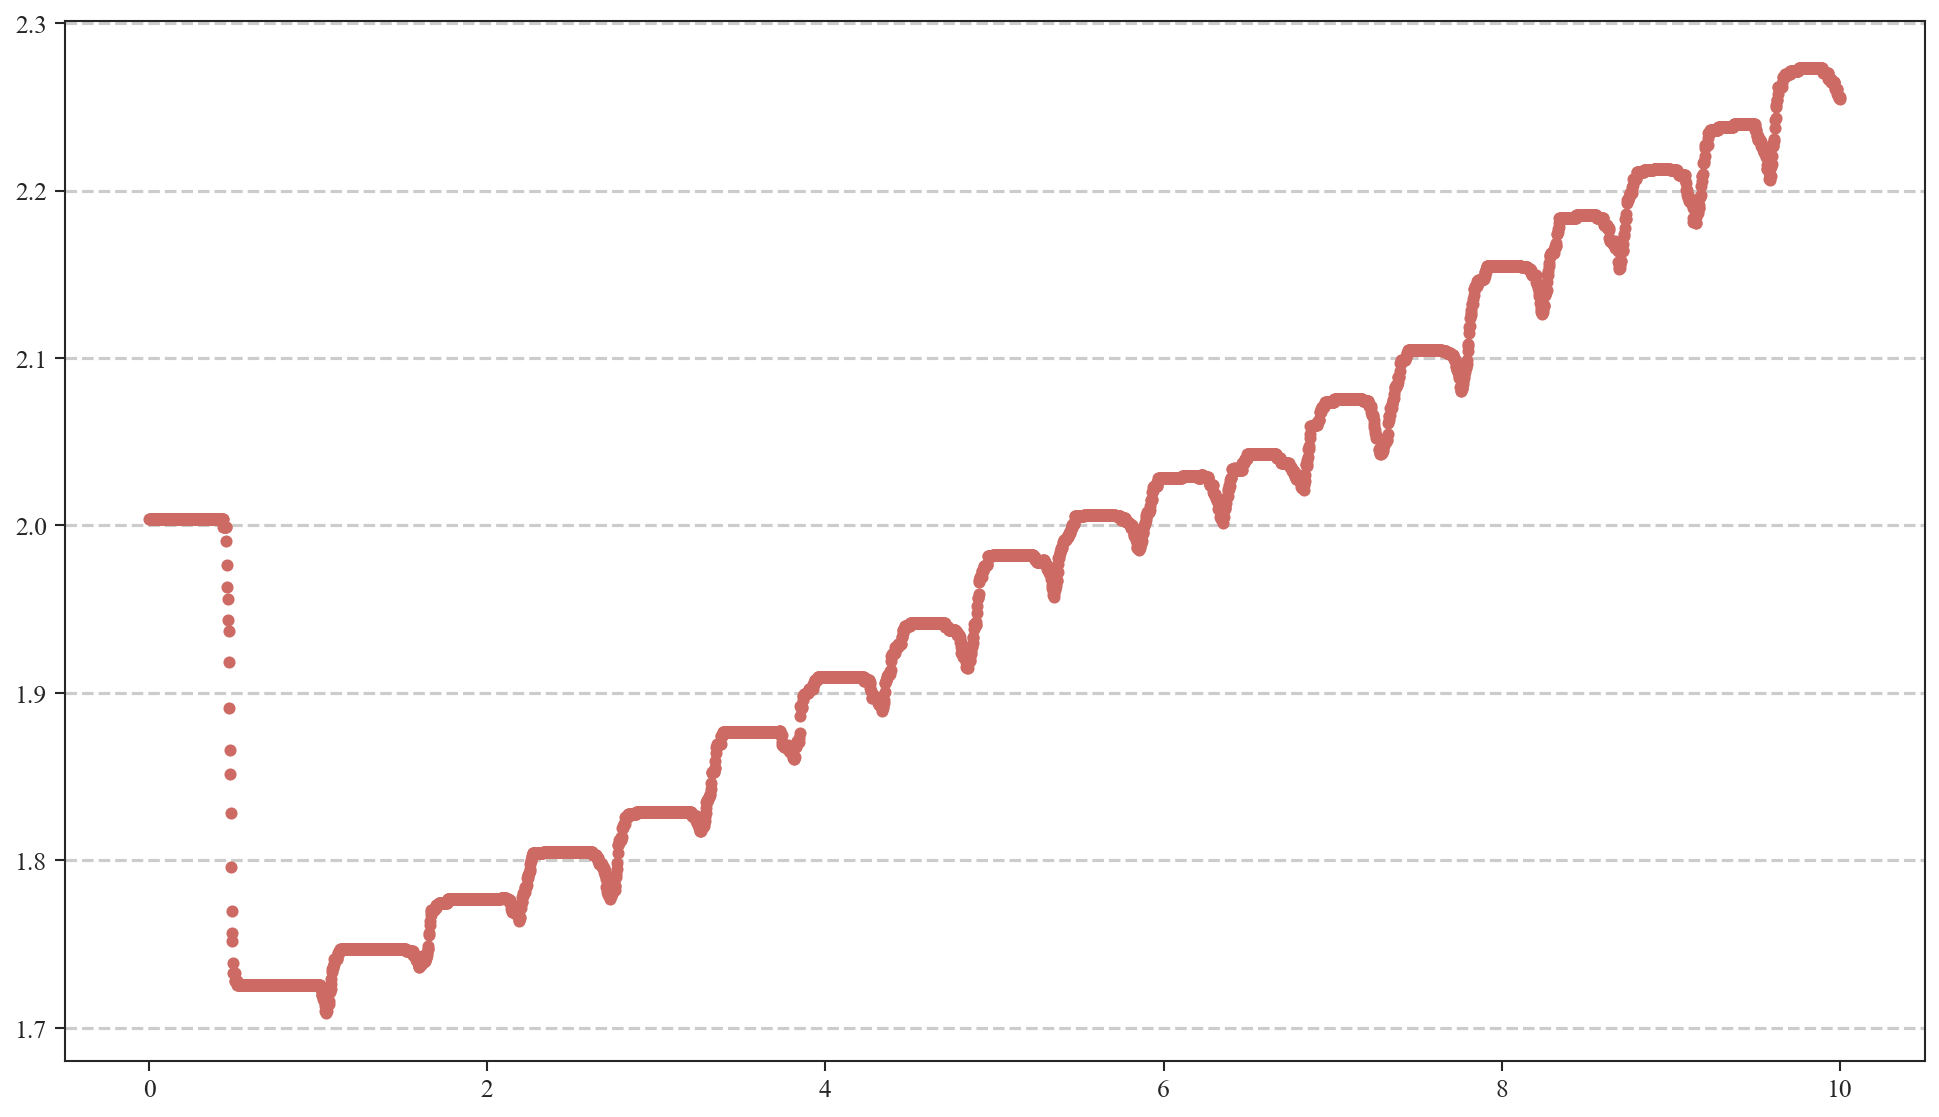

In [294]:
x1 = np.linspace(0,t_max, len(avg_save))
plt.plot(x1, avg_save, 'o', label='Average')